In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , recall_score , precision_score , f1_score , plot_roc_curve , plot_confusion_matrix
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')
from imblearn.combine import SMOTEENN 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Reading the CSV file
df=pd.read_csv("telcom_churn.csv")
df.columns = df.columns.str.replace(' ', '')
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank_transfer_automatic,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,tenure_group_1_12,tenure_group_13_24,tenure_group_25_36,tenure_group_37_48,tenure_group_49_60,tenure_group_61_72
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
x=df.drop(['Churn'],axis=1)
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank_transfer_automatic,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,tenure_group_1_12,tenure_group_13_24,tenure_group_25_36,tenure_group_37_48,tenure_group_49_60,tenure_group_61_72
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [4]:
#Target Class
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

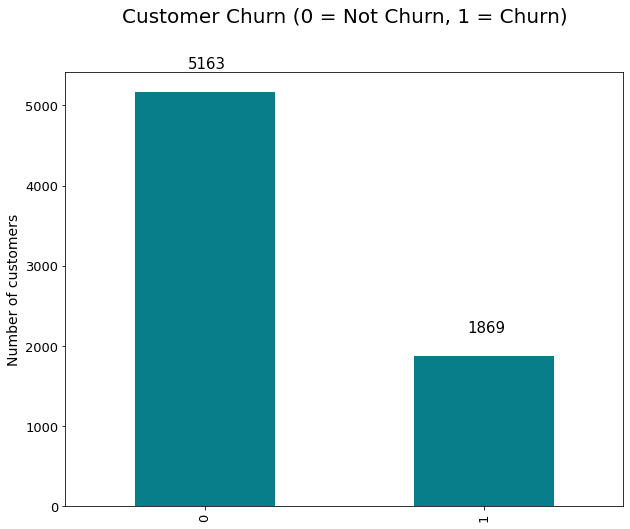

In [5]:
#Visualizing the class of the Target variable
ax = y.value_counts().plot(kind='bar', figsize=(10, 8), fontsize=13, color='#087E8B')
ax.set_title('Customer Churn (0 = Not Churn, 1 = Churn)', size=20, pad=50)
ax.set_ylabel('Number of customers', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 300, str(round(i.get_height(), 2)), fontsize=15)


As we can see the target variable has imbalance classes, we'll deal with the imbalance class by using SMOTE technique.It is an oversampling technique and creates new minority class synthetic samples. SMOTE works using a k-nearest neighbor algorithm to create synthetic data points.

We have a method called SMOTEENN in the imblearn package, the ENN (Edited Nearest Neighbour) is an undersampling technique that removes the instances of majority class on the border or boundary whose predictions made by the KNN algorithm are different from the other majority class points.

First SMOTE is applied to create synthetic data points of minority class samples, then using ENN the data points on the border or boundary are removed to increase the separation of the two classes.

In [6]:
# Splitting the data into training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Decision Tree
###### First Without Handling imbalance class of target variable, later on we'll handle it

In [7]:
# Decision Tree classifier 
model_dt = DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [8]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [9]:
y_pred = model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [10]:
# Evaluation metric
print("Decision Tree Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Decision Tree Accuracy: 0.7734597156398104


In [11]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1519
           1       0.62      0.48      0.54       591

    accuracy                           0.77      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.76      0.77      0.76      2110



Here as  we see that the accuracy is 77% and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers

In [12]:
# Balancing the dataset
sm = SMOTEENN(random_state=42)
X_resampled, y_resampled = sm.fit_sample(x,y)

In [13]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.3)

In [14]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [15]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
print("Decision Tree Accuracy (resampled): {}".format(accuracy_score(yr_test,yr_predict)))
print(classification_report(yr_test, yr_predict, labels=[0,1]))

Decision Tree Accuracy (resampled): 0.9383135257498585
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       781
           1       0.95      0.94      0.94       986

    accuracy                           0.94      1767
   macro avg       0.94      0.94      0.94      1767
weighted avg       0.94      0.94      0.94      1767



In [16]:
print(confusion_matrix(yr_test, yr_predict))

[[727  54]
 [ 55 931]]


Now we can see quite better results, i.e. Accuracy:  94 %, and a very good recall, precision & f1 score for minority class. For majority class, low recall score indicates a higher number of false-negatives.

### Random Forest
###### Random Forest Classifier which is simply a bootstrapped version of many decision trees.


In [17]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [18]:
#Fit the resampled train data
model_rf.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [19]:
y_pred_rf=model_rf.predict(xr_test)

In [20]:
print("Random Forest Accuracy (resampled): {}".format(accuracy_score(yr_test,y_pred_rf)))
print(classification_report(yr_test, y_pred_rf, labels=[0,1]))

Random Forest Accuracy (resampled): 0.9439728353140917
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       781
           1       0.94      0.96      0.95       986

    accuracy                           0.94      1767
   macro avg       0.95      0.94      0.94      1767
weighted avg       0.94      0.94      0.94      1767



Accuracy score did not change significantly with the Random Forest, still a minor improvement.

In [21]:
with np.printoptions(threshold=np.inf):
    print(y_pred_rf)

[1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0
 0 0 0 1 0 1 1 1 1 0 0 0 

<AxesSubplot:>

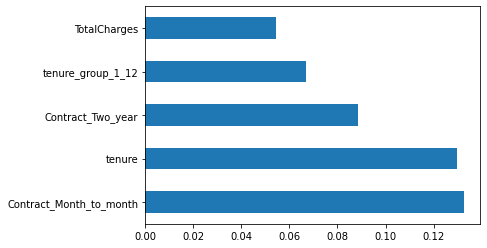

In [26]:
feat_importances = pd.Series(model_rf.feature_importances_, index=xr_train.columns).sort_values(ascending=False)
feat_importances.nlargest(5).plot(kind='barh')

These are the top 5 features which impacts the performance the most to the Regression classifier model

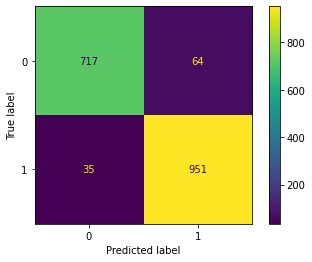

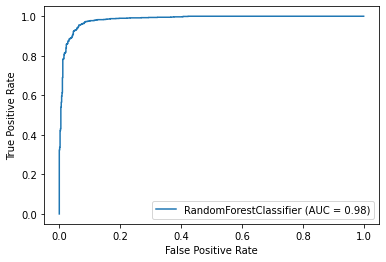

In [22]:
#Plotting Confusion matrix with RandomForest classifier
plot_confusion_matrix(model_rf,xr_test,yr_test)
#AUC-ROC curve
plot_roc_curve(model_rf,xr_test,yr_test)


Plotting AUC- ROC curve, which shows how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between customers who will churn and who are going to stay.

Our final model i.e. Random forest Classifier with SMOTEENN, is now ready and dumped in model_RF.sav, which can be used to prepare API so that we can access our model from UI post cloud deployment.

In [29]:
# Pickling the model
fname = 'model_rf.sav'
pickle.dump(model_rf, open(fname, 'wb'))

In [30]:
load_model_rf = pickle.load(open(fname, 'rb'))
model_score_rf = load_model_rf.score(xr_test, yr_test)
model_score_rf

0.9439728353140917